<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/Copy_of_Clustering_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load our data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df_titanic = pd.read_csv('/content/gdrive/My Drive/titanic (1).csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Some Quick EDA


```
df_titanic.head()
```

In [ ]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


```
sns.boxplot(x='Survived', y="Age", data=df_titanic)
```

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


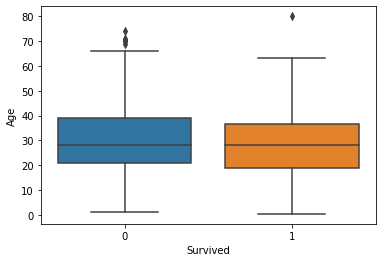

In [ ]:
import seaborn as sns
sns.boxplot(x='Survived', y="Age", data=df_titanic)

```
df_titanic['familysize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] + 1
```

In [ ]:
df_titanic['familysize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] + 1

```
sns.boxplot(x='Survived', y="familysize", data=df_titanic)
```



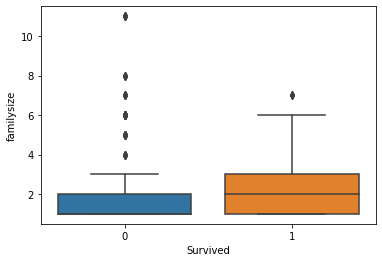

In [ ]:
sns.boxplot(x='Survived', y="familysize", data=df_titanic)

```
df_titanic['alone'] = 0
df_titanic.loc[df_titanic['familysize'] == 1,'alone'] = 1

pd.crosstab(df_titanic.Survived, df_titanic.alone).apply(lambda r: r/r.sum(), axis=1)
```

In [ ]:
df_titanic['alone'] = 0
df_titanic.loc[df_titanic['familysize'] == 1,'alone'] = 1
 
pd.crosstab(df_titanic.Survived, df_titanic.alone).apply(lambda r: r/r.sum(), axis=1)

alone,0,1
Survived,,
0,0.321101,0.678899
1,0.523392,0.476608


## 3. Scale the data


```
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
scaled = scaler.fit_transform(df_titanic[['Fare','Age','familysize']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['Fare_scaled',
 'Age_scaled','familysize_scaled'])
 
df_titanic = df_titanic.join(df_scaled)
df_titanic.head()
```

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
scaled = scaler.fit_transform(df_titanic[['Fare','Age','familysize']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['Fare_scaled',
 'Age_scaled','familysize_scaled'])
 
df_titanic = df_titanic.join(df_scaled)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,familysize,alone,Fare_scaled,Age_scaled,familysize_scaled
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,2,0,0.014151,0.271174,0.1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,0,0.139136,0.472229,0.1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,1,0.015469,0.321438,0.0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,2,0,0.103644,0.434531,0.1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1,0.015713,0.434531,0.0


## 4. Run the model

```
from sklearn.cluster import KMeans

X = df_titanic[['Fare_scaled','Age_scaled','familysize_scaled']]

kmeans = KMeans(n_clusters = 3)
df_titanic['kmeans_clusters'] = kmeans.fit_predict(X)

```


In [ ]:
from sklearn.cluster import KMeans
 
X = df_titanic[['Fare_scaled','Age_scaled','familysize_scaled']]
 
kmeans = KMeans(n_clusters = 3)
df_titanic['kmeans_clusters'] = kmeans.fit_predict(X)

```
df_titanic[['Fare_scaled','Age_scaled','familysize_scaled','kmeans_clusters']]
```

In [ ]:
df_titanic[['Fare_scaled','Age_scaled','familysize_scaled','kmeans_clusters']]

,Fare_scaled,Age_scaled,familysize_scaled,kmeans_clusters
0,0.014151,0.271174,0.1,0
1,0.139136,0.472229,0.1,1
2,0.015469,0.321438,0.0,0
3,0.103644,0.434531,0.1,0
4,0.015713,0.434531,0.0,0
...,...,...,...,...
882,0.025374,0.334004,0.0,0
883,0.058556,0.233476,0.0,0
884,0.045771,0.082684,0.3,2
885,0.058556,0.321438,0.0,0


```
df_titanic['kmeans_clusters'].value_counts()
```

In [ ]:
df_titanic['kmeans_clusters'].value_counts()

0    539
1    241
2    107
Name: kmeans_clusters, dtype: int64

```
import matplotlib.pyplot as plt

plt.scatter(df_titanic['Age'],df_titanic['Fare'],c = df_titanic['kmeans_clusters'])
```

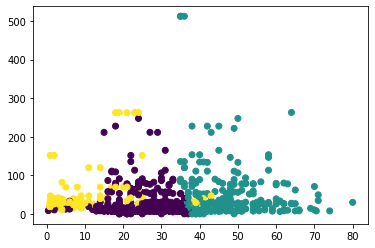

In [ ]:
import matplotlib.pyplot as plt
 
plt.scatter(df_titanic['Age'],df_titanic['Fare'],c = df_titanic['kmeans_clusters'])

```
sns.catplot(x='Age', col='kmeans_clusters', data= df_titanic, kind='box', orient='v')
```

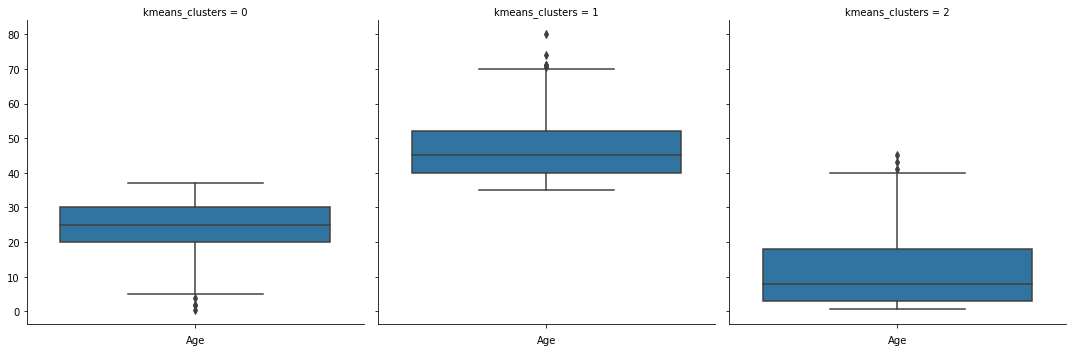

In [ ]:
sns.catplot(x='Age', col='kmeans_clusters', data= df_titanic, kind='box', orient='v')

```
sns.catplot(x='familysize', col='kmeans_clusters', data= df_titanic, kind='box', orient='v')
```

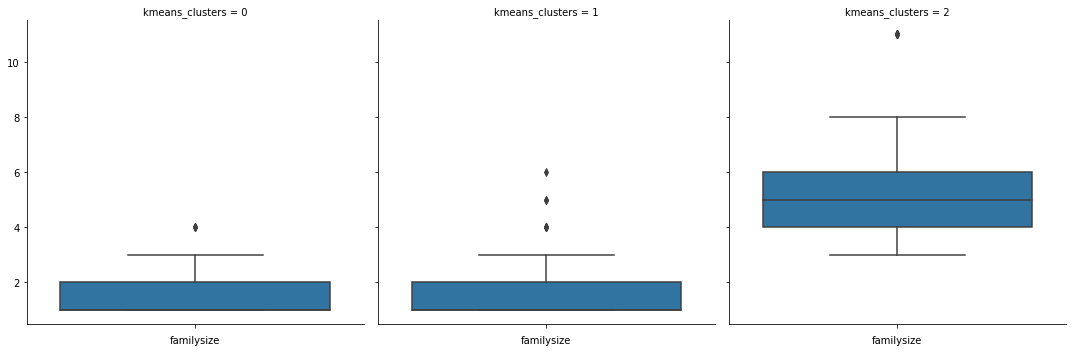

In [ ]:
sns.catplot(x='familysize', col='kmeans_clusters', data= df_titanic, kind='box', orient='v')

```
sns.catplot(x='familysize', y= 'Age', col='kmeans_clusters', hue='Sex', data = df_titanic)
```

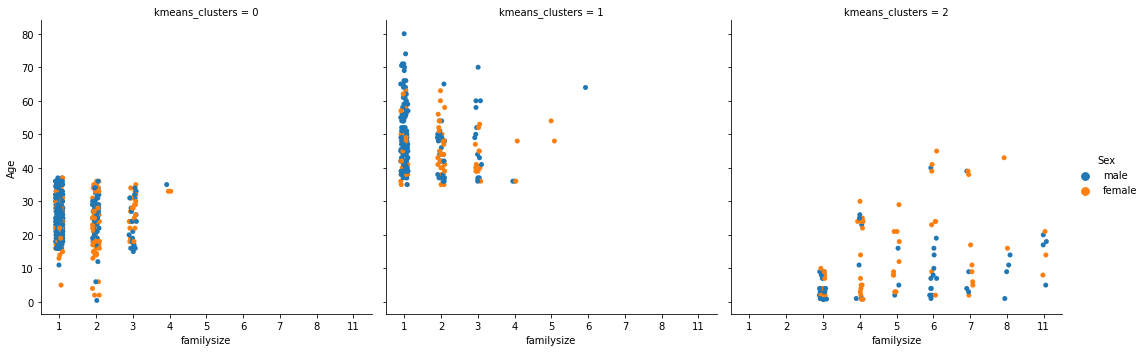

In [ ]:
sns.catplot(x='familysize', y= 'Age', col='kmeans_clusters', hue='Sex', data = df_titanic)

```
pd.crosstab(df_titanic.kmeans_clusters, df_titanic.Survived).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)
```


In [ ]:
pd.crosstab(df_titanic.kmeans_clusters, df_titanic.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
kmeans_clusters,,
0,0.632653,0.367347
1,0.605809,0.394191
2,0.542056,0.457944


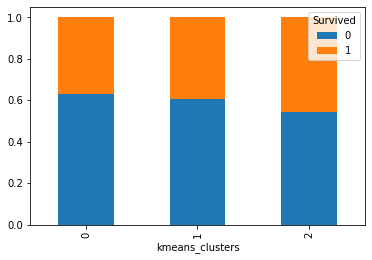

In [ ]:
pd.crosstab(df_titanic.kmeans_clusters, df_titanic.Survived).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

Include additional features to create clusters that will have very different rates of survival. 

In [ ]:
pd.crosstab(df_titanic.Survived, df_titanic.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,368
1,136,87,119


In [ ]:
df_titanic = df_titanic.join(pd.get_dummies(df_titanic['Pclass'], prefix='pclass'))

In [ ]:
df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,familysize,alone,Fare_scaled,Age_scaled,familysize_scaled,kmeans_clusters,pclass_1,pclass_2,pclass_3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,2,0,0.014151,0.271174,0.1,0,0,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,0,0.139136,0.472229,0.1,1,1,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,1,0.015469,0.321438,0.0,0,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,2,0,0.103644,0.434531,0.1,0,1,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1,0.015713,0.434531,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,1,1,0.025374,0.334004,0.0,0,0,1,0
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,1,0.058556,0.233476,0.0,0,1,0,0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,4,0,0.045771,0.082684,0.3,2,0,0,1
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,1,1,0.058556,0.321438,0.0,0,1,0,0


In [ ]:
df_titanic = df_titanic.join(pd.get_dummies(df_titanic['Sex'], prefix='Sex'))

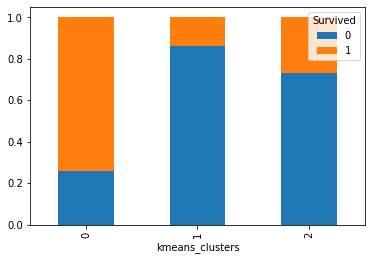

In [ ]:
from sklearn.cluster import KMeans

X = df_titanic[['Fare_scaled', 'Age_scaled', 'familysize_scaled', 'pclass_1', 'pclass_2', 'pclass_3', 'Sex_male', 'Sex_female']]

kmeans = KMeans(n_clusters = 3)
df_titanic['kmeans_clusters'] = kmeans.fit_predict(X)

pd.crosstab(df_titanic.kmeans_clusters, df_titanic.Survived).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

### Challenge

- With your Boston Housing Data, create clusters based on all features but median home value.
- Using this new cluster variable, create binary features.
- Include the new binary features in a model to predict median home value and calculate a cross-validated performance score.
- Does the performance improve when we include these clusters?
- Choose your best model, and use the same features to repeat this process